<a href="https://www.kaggle.com/kalilurrahman/feedback-prize-eda-first?scriptVersionId=89689848" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import spacy
from spacy import displacy
from pylab import cm, matplotlib
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
count = 0
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        count = count + 1
print(count)
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

15605


# Feeback Prize
## Aim of the competition: The use case this competition targets is annotating different parts of the essays into 7 different categories to help the students with their writing abilities. The categories are as follows:

['Lead',
 'Position',
 'Evidence',
 'Claim',
 'Concluding Statement',
 'Counterclaim',
 'Rebuttal']
 
 ###### Curation credit goes to multiple kernels. To be updated.


In [2]:
path = Path('../input/feedback-prize-2021/train')
train = pd.read_csv('../input/feedback-prize-2021/train.csv')
train.head()

,id,discourse_id,discourse_start,discourse_end,discourse_text,discourse_type,discourse_type_num,predictionstring
0,423A1CA112E2,1.622628e+12,8.0,229.0,Modern humans today are always on their phone....,Lead,Lead 1,1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 1...
1,423A1CA112E2,1.622628e+12,230.0,312.0,They are some really bad consequences when stu...,Position,Position 1,45 46 47 48 49 50 51 52 53 54 55 56 57 58 59
2,423A1CA112E2,1.622628e+12,313.0,401.0,Some certain areas in the United States ban ph...,Evidence,Evidence 1,60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
3,423A1CA112E2,1.622628e+12,402.0,758.0,"When people have phones, they know about certa...",Evidence,Evidence 2,76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 9...
4,423A1CA112E2,1.622628e+12,759.0,886.0,Driving is one of the way how to get around. P...,Claim,Claim 1,139 140 141 142 143 144 145 146 147 148 149 15...


In [3]:
train.discourse_type.unique().tolist()


['Lead',
 'Position',
 'Evidence',
 'Claim',
 'Concluding Statement',
 'Counterclaim',
 'Rebuttal']

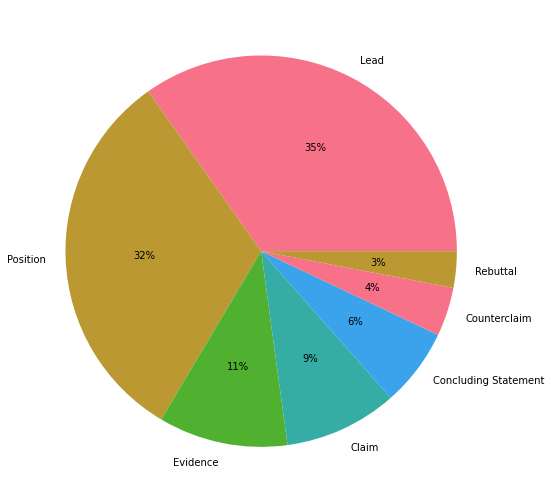

In [4]:
colors = sns.color_palette('husl')[0:5]
fig = plt.figure(figsize=(16,9))

plt.pie(x=train.discourse_type.value_counts(), labels = train.discourse_type.unique(), colors = colors, autopct='%.0f%%')
plt.show()

In [5]:
fig = px.bar(x = np.unique(train["discourse_type"]),
y = [list(train["discourse_type"]).count(i) for i in np.unique(train["discourse_type"])] , 
            color = np.unique(train["discourse_type"]),
             color_continuous_scale="mygbm") 
fig.update_xaxes(title="Assets")
fig.update_yaxes(title = "Number of Rows")
fig.update_layout(showlegend = True,
    title = {
        'text': 'Distribution of Essay Decision/Discourse Type  ',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [6]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image


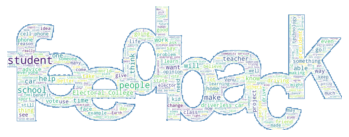

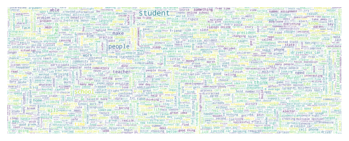

In [7]:


feedback='../input/kaggle/64-646880_feedback-feedback-png.png'
feedback_mask = np.array(Image.open(feedback))

wordcloud = WordCloud()

wordcloud = WordCloud(stopwords=STOPWORDS, 
                      max_font_size=80, max_words=5000,
                      width = 1000, height = 500, 
                      mask=feedback_mask, 
                      contour_width=3, 
                      contour_color='steelblue',
                      background_color='white').generate(' '.join(txt for txt in train["discourse_text"]))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

feedback='../input/kaggle/kaggle-logo.png'
feedback_mask = np.array(Image.open(feedback))
wordcloud = WordCloud()
wordcloud = WordCloud(stopwords=STOPWORDS, 
                      max_font_size=80, max_words=5000,
                      width = 1000, height = 500, 
                      mask=feedback_mask, 
                      contour_width=3, 
                      contour_color='steelblue',
                      background_color='white').generate(' '.join(txt for txt in train["discourse_text"]))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [8]:
colors = {
            'Lead': '#F7D4F6',
            'Position': '#9A0794',
            'Evidence': '#98CA32',
            'Claim': '#FD3A0F',
            'Concluding Statement': '#341109',
            'Counterclaim': '#700CBC',
            'Rebuttal': '#210934'
         }

def visualize(example):
    ents = []
    for i, row in train[train['id'] == example].iterrows():
        ents.append({
                        'start': int(row['discourse_start']), 
                         'end': int(row['discourse_end']), 
                         'label': row['discourse_type']
                    })

    with open(path/f'{example}.txt', 'r') as file: data = file.read()

    doc2 = {
        "text": data,
        "ents": ents,
        "title": example
    }

    options = {"ents": train.discourse_type.unique().tolist(), 
               "colors": colors , 
               "fine_grained":True, 
               "add_lemma":True,
               "collapse_punct":False,
               "collapse_phrases":True,
               "font":"Roboto",
               "distance":250}
    displacy.render(doc2, style="ent", options=options, manual=True, jupyter=True)



In [9]:
examples = train['id'].sample(n=5, random_state=42).values.tolist()

for ex in examples:
    visualize(ex)
    print('\n')

In [10]:
train['word_count'] = train['discourse_text'].apply(lambda x: len(x.split()))
discourse_types = train['discourse_type'].unique()
colors = ['#8000FF', '#f9d5e5', '#eeac99', '#e06377', '#c83349', '#5b9aa0', '#d6d4e0','#b8a9c9','#622569']

In [11]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


In [12]:
def annotate_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)


In [13]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=5, cols=2,
    specs=[[{}, {"rowspan": 2}],
           [{}, None],
           [{"rowspan": 1, "colspan": 2}, None],
           [{"rowspan": 1, "colspan": 2}, None],
           [{}, {}]],
    print_grid=True)

for idx, discourse_type in enumerate(discourse_types):
    #print(idx)
    if idx == 0: 
        fig.add_trace(go.Histogram(x=train.loc[train['discourse_type'] == discourse_type, 'word_count'].values,histnorm='percent',  name=discourse_type), row=1, col=1)
        fig.add_annotation(x=400, y=3, showarrow=False,text=discourse_type, row=1, col=1)
    elif idx == 1:
        fig.add_trace(go.Histogram(x=train.loc[train['discourse_type'] == discourse_type, 'word_count'].values,histnorm='percent',  name=discourse_type), row=1, col=2)
        fig.add_annotation(x=75, y=5, showarrow=False,text=discourse_type, row=1, col=2)
    elif idx == 2:
        fig.add_trace(go.Histogram(x=train.loc[train['discourse_type'] == discourse_type, 'word_count'].values,histnorm='percent',  name=discourse_type), row=2, col=1)
        fig.add_annotation(x=600, y=2, showarrow=False,text=discourse_type, row=2, col=1)
    elif idx == 3:
        fig.add_trace(go.Histogram(x=train.loc[train['discourse_type'] == discourse_type, 'word_count'].values,histnorm='percent',  name=discourse_type), row=3, col=1)
        fig.add_annotation(x=120, y=4, showarrow=False,text=discourse_type, row=3, col=1)
    elif idx == 4:
        fig.add_trace(go.Histogram(x=train.loc[train['discourse_type'] == discourse_type, 'word_count'].values,histnorm='percent',  name=discourse_type), row=4, col=1)
        fig.add_annotation(x=350, y=2.5, showarrow=False,text=discourse_type, row=4, col=1)
    elif idx == 5:
        fig.add_trace(go.Histogram(x=train.loc[train['discourse_type'] == discourse_type, 'word_count'].values,histnorm='percent',  name=discourse_type), row=5, col=1)
        fig.add_annotation(x=150, y=8, showarrow=False,text=discourse_type, row=5, col=1)
    elif idx == 6:
        fig.add_trace(go.Histogram(x=train.loc[train['discourse_type'] == discourse_type, 'word_count'].values,histnorm='percent',  name=discourse_type), row=5, col=2)
        fig.add_annotation(x=200, y=6, showarrow=False,text=discourse_type, row=5, col=2)
        
fig.update_layout(height=1800, width=1400, title_text="Wordcount for various discourses",   
   #               xaxis_title="Size",
   #               yaxis_title="Percentage",
                  legend_title="Discourse Type",
                  font=dict(
                      family="Roboto, Verdana, Courier New, monospace",
                      size=18,
                      color="Magenta"
                  )
                 )
fig.show()

This is the format of your plot grid:
[ (1,1) x,y   ]  ⎡ (1,2) x2,y2 ⎤
[ (2,1) x3,y3 ]  ⎣      :      ⎦
[ (3,1) x4,y4           -      ]
[ (4,1) x5,y5           -      ]
[ (5,1) x6,y6 ]  [ (5,2) x7,y7 ]



[![work-progress-loading-bar-concept-hand-drawing-work-progress-loading-bar-concept-marker-transparent.jpg](https://i.postimg.cc/xTTQ0mKy/work-progress-loading-bar-concept-hand-drawing-work-progress-loading-bar-concept-marker-transparent.jpg)](https://postimg.cc/23JMGV9V)